In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a0de79702531816728e24cb8b2312d9


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | san cristobal
Processing Record 4 of Set 1 | teahupoo
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | langxiang
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | humberto de campos
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | corvallis
Processing Record 12 of Set 1 | labuhan
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | nantucket
Processing Record 15 of Set 1 | davila
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | chengde
Processing Record 19 of Set 1 | nsanje
Processing Record 20 of Set 1 | changji
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | pan

Processing Record 38 of Set 4 | husavik
Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | naujamiestis
Processing Record 41 of Set 4 | phonhong
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | wahran
City not found. Skipping...
Processing Record 44 of Set 4 | arganil
Processing Record 45 of Set 4 | santa
Processing Record 46 of Set 4 | faya
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | coaticook
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | merrill
Processing Record 2 of Set 5 | barguzin
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | zhangzhou
Processing Record 5 of Set 5 | yanagawa
Processing Record 6 of Set 5 | erzin
Processing Record 7 of Set 5 | harper
Processing Record 8 of Set 5 | pringsewu
Processing Record 9 of Set 5 | vostok
Processing Record 10 of Set 5 | fo

Processing Record 26 of Set 8 | cantagalo
Processing Record 27 of Set 8 | isangel
Processing Record 28 of Set 8 | mattru
Processing Record 29 of Set 8 | norrkoping
Processing Record 30 of Set 8 | natal
Processing Record 31 of Set 8 | mar del plata
Processing Record 32 of Set 8 | kyren
Processing Record 33 of Set 8 | ixtapa
Processing Record 34 of Set 8 | ola
Processing Record 35 of Set 8 | boyolangu
Processing Record 36 of Set 8 | kysyl-syr
Processing Record 37 of Set 8 | brest
Processing Record 38 of Set 8 | cap malheureux
Processing Record 39 of Set 8 | warqla
City not found. Skipping...
Processing Record 40 of Set 8 | lavrentiya
Processing Record 41 of Set 8 | luena
Processing Record 42 of Set 8 | basudebpur
Processing Record 43 of Set 8 | lagos
Processing Record 44 of Set 8 | abha
Processing Record 45 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 46 of Set 8 | havelock
Processing Record 47 of Set 8 | yar-sale
Processing Record 48 of Set 8 | paka
Processing 

Processing Record 13 of Set 12 | jinchang
Processing Record 14 of Set 12 | avera
Processing Record 15 of Set 12 | marquette
Processing Record 16 of Set 12 | uruzgan
Processing Record 17 of Set 12 | haicheng
Processing Record 18 of Set 12 | buala
Processing Record 19 of Set 12 | ayia marina
Processing Record 20 of Set 12 | ulaangom
Processing Record 21 of Set 12 | bokspits
City not found. Skipping...
Processing Record 22 of Set 12 | lar
Processing Record 23 of Set 12 | panjab
Processing Record 24 of Set 12 | yakeshi
Processing Record 25 of Set 12 | smirnykh
Processing Record 26 of Set 12 | imelda
Processing Record 27 of Set 12 | aykhal
Processing Record 28 of Set 12 | weligama
Processing Record 29 of Set 12 | pacifica
Processing Record 30 of Set 12 | kiama
Processing Record 31 of Set 12 | kapit
Processing Record 32 of Set 12 | daura
Processing Record 33 of Set 12 | banepa
Processing Record 34 of Set 12 | eldorado
Processing Record 35 of Set 12 | shellbrook
Processing Record 36 of Set 12

In [11]:
len(city_data)

567

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.28,169.85,59.00,74,100,23.00,NZ,2020-10-25 03:48:15
1,Rikitea,-23.12,-134.97,75.00,83,98,20.54,PF,2020-10-25 03:48:15
2,San Cristobal,7.77,-72.22,66.51,81,26,1.28,VE,2020-10-25 03:45:41
3,Teahupoo,-17.83,-149.27,80.01,83,75,13.87,PF,2020-10-25 03:48:15
4,Upernavik,72.79,-56.15,20.41,91,74,7.61,GL,2020-10-25 03:48:15
5,Langxiang,46.95,128.88,46.02,55,0,5.30,CN,2020-10-25 03:48:15
6,Vaini,-21.20,-175.20,75.20,88,75,10.29,TO,2020-10-25 03:48:15
7,Humberto De Campos,-2.60,-43.46,79.93,79,85,6.26,BR,2020-10-25 03:48:16
8,Iqaluit,63.75,-68.51,19.40,79,75,4.70,CA,2020-10-25 03:48:16
9,Geraldton,-28.77,114.60,96.80,13,0,16.11,AU,2020-10-25 03:48:16


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2020-10-25 03:48:15,-46.28,169.85,59.00,74,100,23.00
1,Rikitea,PF,2020-10-25 03:48:15,-23.12,-134.97,75.00,83,98,20.54
2,San Cristobal,VE,2020-10-25 03:45:41,7.77,-72.22,66.51,81,26,1.28
3,Teahupoo,PF,2020-10-25 03:48:15,-17.83,-149.27,80.01,83,75,13.87
4,Upernavik,GL,2020-10-25 03:48:15,72.79,-56.15,20.41,91,74,7.61
5,Langxiang,CN,2020-10-25 03:48:15,46.95,128.88,46.02,55,0,5.30
6,Vaini,TO,2020-10-25 03:48:15,-21.20,-175.20,75.20,88,75,10.29
7,Humberto De Campos,BR,2020-10-25 03:48:16,-2.60,-43.46,79.93,79,85,6.26
8,Iqaluit,CA,2020-10-25 03:48:16,63.75,-68.51,19.40,79,75,4.70
9,Geraldton,AU,2020-10-25 03:48:16,-28.77,114.60,96.80,13,0,16.11


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603599079.5286443

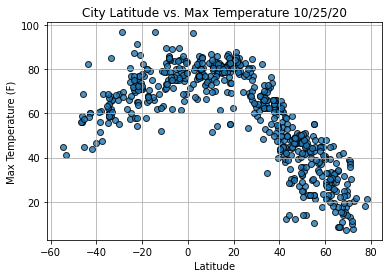

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

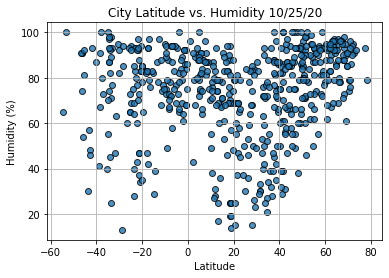

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

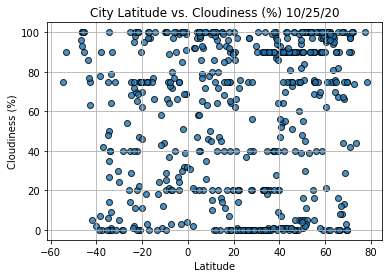

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

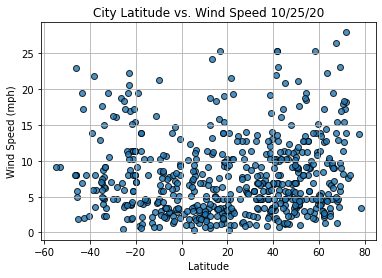

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()